# CMSE401 Project Report

By Lesiyon Lemayana Raymond

<img alt="Simple Icon of a camera. This is just a place holder for your image" src="https://www.biorxiv.org/content/biorxiv/early/2020/06/05/2020.06.05.135962/F2.large.jpg?width=800&height=600&carousel=1" width="80%">

Image from:https://www.biorxiv.org/content/10.1101/2020.06.05.135962v1.full

---
### Abstract

My project is focused on the bionformatics algorithms used for metagenomic analyses. Metagenomics analyses encompasses the analysis of collective genomic compositions of microorganims present in an environmental sample or living organism. Getting knowledge of different genomics provides different significant biological insights examples are development of antibiotic resistance by bacteria. 

Different algorithms have been develop for conducting plasmid genome assembly. Some of the algorithms I came across Sequence Contents-Aware Plasmid Peeler (SCAPP), Recycler, MEGAHIT, and metaplasmidSPAdes. MEGAHIT will be my area of focus in this project.

MEGAHIT is a metagenomic assembler used for assembling large and complex metagenomics Next Generation Sequencing (NGS) reads. It uses succint de Bruijn graph(sdBG) to achieve time and cost efficient assembly. NGS technologies has enabled massive sequencing of organisms providing the opportunities to study metagenomics and understand natural micriobiota like human guts. With lack of reference genome to the enormous sets of sequences produced, the need for de novo assembly of metagenomics data is crucial. The process for de novo assembly is costly especially when working with large datasets. For instance, a typical soil metagenomics dataset comprises of 252G base even after trimming low quality bases (Li et al., 2015). The megahit utilizes the sdGB and parallelism using GPUs to make the process of metagenomics assembly faster.

The breakdown of how the software performs genomic assembly is shown below: 
<img alt="Simple Icon of a camera. This is just a place holder for your image" src="https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/bioinformatics/31/10/10.1093_bioinformatics_btv033/2/m_btv033f1p.gif?Expires=1620937231&Signature=mNuvEf-aeFVq5YlLSwtIuEEm6rPPCH~K658~BS6HDWj~D-LCS6q3yaFZ7iq3Gw3QSJJQf7go~ZGz-YKeYnXrQ9NBTv3-KfnsQi0g29ky~KDUSvccfhWwgr32QdOdzya5ThZiiPI9qOCqsS~MwDME3YyrjRQBZUXdA-ZqCY7M6TPI9saWGa4Koo5CyJLg9qERLFqyNbKKcyrI5elZiJ-60Lm1DpcFRztZBvsD4-znvWSkg7rv4e~K6BSCCyj1NbcxJe3xHZ4RG2-CTTD1ADaMSeDOLDZ8C57r912juKHXRtvG5zD-p-ZlucMsU69AFHPn8phIUvBgp9NkDegR7Z596Q__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA" width="80%">

Image from:https://academic.oup.com/bioinformatics/article/31/10/1674/177884

----
### METHODOLOGY

#### Data

The data used for this projects can be food in the folder data as archive files. It can also be loaded directly to your working directory using the following commands. 

```
curl -O https://s3-us-west-1.amazonaws.com/dib-training.ucdavis.edu/metagenomics-scripps-2016-10-12/SRR1976948.abundtrim.subset.pe.fq.gz

curl -O https://s3-us-west-1.amazonaws.com/dib-training.ucdavis.edu/metagenomics-scripps-2016-10-12/SRR1977249.abundtrim.subset.pe.fq.gz
```
These are data that have been run through k-mer abundance trimming and subsampled so that we can run an assembly in a fairly short time period. 

<div class="alert alert-block alert-info">
<b>Notes:</b> Incase you download the data directly ensure to make a directory called data, and put the downloaded data there. 
</div>

The previous session for this project involved installing the MEGAHIT software to HPCC. I then realized MEGAHIT software was installed in HPCC platform already. To load the software to HPCC, you can use the command below.
```
module load MEGAHIT

```

Incase you will need to do installation by yourself, look at the **README.md** file for this project. 

The software has different runtime options which can be found by either of this commands. This flag option can be use to optimize the performance of the software. 

```
megahit 
megahit -h

```
<div class="alert alert-block alert-info">
<b>Notes:</b> If you want to download the software by yourself look at README.md file for this project.
</div>

For this project, I went through different options to conduct a benchmarking analysis for MEGAHIT software. The options I picked for this projects are as follows: 

    1. -t
    2. --presets

#### *1.  -t*

The command specifies the number of CPU threads to be used. By default the program uses the maximum number of threads available in the CPU.The maximum value is assigned if no number of the CPU threads is specified during the software runtime. This command specifies specifies the number of the threads; 

```
omp_get_max_threads()

```

Best of this, the maximum number of the threads in a CPU were 20, which was the default value is not specified.

To specify the number of CPU threads, I used the followind command

```
megahit --12 data/SRR1976948.abundtrim.subset.pe.fq.gz,data/SR
R1977249.abundtrim.subset.pe.fq.gz -t 20 -o combined
```
#### **2.  --presets**

Using this flag option will override some paremeters used in the software at runtime. There are two main presets for the software.

<div>
    <ul>
    <li>meta-sensitive
        <ul>
            <li>--min-count 1 </li>
            <li>-k-list 21,29,39,49,...,129,141</li>
        </ul>
    </li>
    <li>meta-large
        <ul>
            <li>--k-min 27 & --k-max 127</li>
            <li>--k-step 10</li>
        </ul>
    </li>
</ul>
</div>

In this case *k* stands the different k-mers used to construct a succinct de Bruijn graphs (sdBG). The algorithms iterates through this values of k and create subsequence of the the length and later used to construct sdBG. The min-count describes the k-mers to be kept or discarded.

presets: meta-sensitive
```
megahit --12 data/SRR1976948.abundtrim.subset.pe.fq.gz,data/SR
R1977249.abundtrim.subset.pe.fq.gz -t 20 --presets meta-sensitive -o combined
```
presets: meta-large
```
megahit --12 data/SRR1976948.abundtrim.subset.pe.fq.gz,data/SR
R1977249.abundtrim.subset.pe.fq.gz -t 20 --presets meta-large -o combined
```



---
### Timing Results

For the number of the threads used to run the software in the CPU, I used the threads starting from 2 to the maximum available threads. The table of the number of threads and time taken is shown here. 

| No. of threads | Time (s)        
| :-: |-------------: 
|2 | 1336.9  
|5 | 554.7
|10 | 324.9 
|15 | 237.7
|20 | 238.5

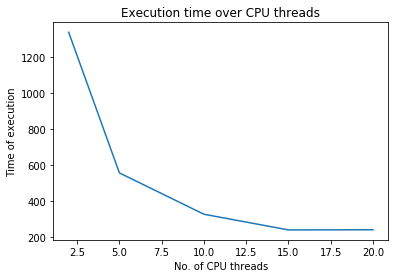

In [5]:
import matplotlib.pyplot as plt
x = [2, 5, 10, 15, 20]
y = [1336.9, 554.7, 324.9, 237.7, 238.5]

plt.plot(x, y)
plt.title("Execution time over CPU threads")
plt.xlabel("No. of CPU threads")
plt.ylabel("Time of execution");

While using the --presets options, I used 20 threads which is the maximum a gives the best performance. The time execution time for each presets in the table below. 

| Presets | Time (s)        
| :- |-------------: 
|meta-sensitive | 377.59
|meta-large | 348.3


---
### Conclusion

The project was on installing MEGAHIT software in HPCC and then doing it benchmarkng. In running the code on different threads, we see a plateau shape in which there is a sharp decline initially and it plateaus as it approaches as the threads increase. So with this in mind, I think running the software at 20 threads of cpu will give an reasonable execution time. The maximum number of threads in a CPU were 20, which makes me wonder what happens to the execution time if the number of threads were more.

For presets value, meta-sensitive performed the was as compared to meta-large. And this makes perfect senses since the meta-large uses a shorter list of k-mer uses to construct the sdBG. 

Another options for the software was to use --use-gpu, which utilizes CUDA to parallelize the program. I kept running into the issue of depreceated version of --use-gpu. The paper of the methods mentions using this options as 3-6 times fasters as compared to cpu-only compilation. It would have been interesting to confirm they statement.

Overally, the project was really interesting. It was a bit hard to find the right information about the software but we learnt throughout the proess. 

### Reference

- Li, D., Liu, C.-M., Luo, R., Sadakane, K., & Lam, T.-W. (2015). MEGAHIT: an ultra-fast single-node solution for large and 	complex metagenomics assembly via succinct de Bruijn graph. Bioinformatics, 31(10), 1674–1676. https://doi.org/10.1093/bioinformatics/btv033
- https://2017-ucsc-metagenomics.readthedocs.io/en/latest/assemble.html

- https://labs.cd2h.org/gitforager/repository/repository.jsp?id=30113176